In [1]:
# ! pip install shuffle

In [34]:
import pyforest

import random
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

### Import the Data

In [4]:
df = pd.read_csv('news.csv')
df.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Exploratory Data Analysis

<IPython.core.display.Javascript object>

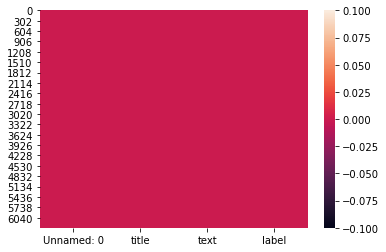

In [13]:
sns.heatmap(df.isnull())

our data is cleaned and there is no missing value is there

In [5]:
df['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

<IPython.core.display.Javascript object>

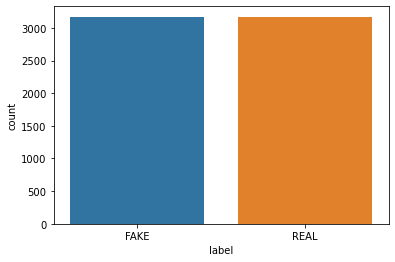

In [6]:
sns.countplot(df['label'])

In [7]:
df['title'].unique()

array(['You Can Smell Hillary’s Fear',
       'Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)',
       'Kerry to go to Paris in gesture of sympathy', ...,
       'Anti-Trump Protesters Are Tools of the Oligarchy     : Information',
       'In Ethiopia, Obama seeks progress on peace, security in East Africa',
       "Jeb Bush Is Suddenly Attacking Trump. Here's Why That Matters"],
      dtype=object)

In [8]:
df.shape

(6335, 4)

In [9]:
df.shape

(6335, 4)

In [11]:
labels=df.label

In [12]:
labels

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

### Spliting the the data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

**now our data is split for further process**

### Vectorizing the Data

In [20]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [21]:
tfidf_vectorizer

TfidfVectorizer(max_df=0.7, stop_words='english')

In [22]:
train=tfidf_vectorizer.fit_transform(x_train) 
test=tfidf_vectorizer.transform(x_test)

In [23]:
train

<5068x61651 sparse matrix of type '<class 'numpy.float64'>'
	with 1337098 stored elements in Compressed Sparse Row format>

In [24]:
test

<1267x61651 sparse matrix of type '<class 'numpy.float64'>'
	with 322056 stored elements in Compressed Sparse Row format>

**now the data is vectorize and split** <br>
**so we are ready to apply ml algorithm**

### Logistic Regression

In [27]:
lgs = LogisticRegression(penalty='l2',multi_class='ovr')

In [29]:
lgs.fit(train, y_train)

LogisticRegression(multi_class='ovr')

In [30]:
lgs_pred=lgs.predict(test)

In [31]:
lgs_pred

array(['REAL', 'FAKE', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype=object)

**now the data is trained and predicted let us check the score**

In [32]:
print(lgs.score(test, y_test))

0.9171270718232044


### Support vector classifier

In [35]:
svm = SVC(kernel='linear')

In [36]:
svm.fit(train, y_train)

SVC(kernel='linear')

In [37]:
pred_svm=svm.predict(test)

**now the data is trained and predicted let us check the score**

In [38]:
print(svm.score(test, y_test))

0.930544593528019


In [40]:
print('score of Logistic Regression',lgs.score(test, y_test))
print('score of Support vector classifier',svm.score(test, y_test))

score of Logistic Regression 0.9171270718232044
score of Support vector classifier 0.930544593528019


So we can see Support vector classifier score good so lets go with Support vector classifier